# DATA PRE-PROCESSING

In [1]:
#Import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12,12
pd.set_option('display.max_columns',None)

In [3]:
#Read dataset

df = pd.read_csv('Employee_Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [4]:
#Divide numeric and categorical columns

numeric = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate',
           'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
           'PercentSalaryHike','TotalWorkingYears', 'TrainingTimesLastYear', 
           'YearsAtCompany', 'YearsInCurrentRole','YearsSinceLastPromotion', 'YearsWithCurrManager']
           
categorical = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
               'JobRole', 'MaritalStatus', 'OverTime', 'Education', 'EnvironmentSatisfaction',
               'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'PerformanceRating',
               'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']

## Handle Missing and Duplicated Value

In [5]:
duplicate = df.duplicated().sum()
missing = df.isnull().sum()
print(f'Jumlah duplicated value:    {duplicate}')
print(f'Jumlah missing value:\n{missing}')

Jumlah duplicated value:    0
Jumlah missing value:
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany    

**Finding:**

The data has no duplicate values and all columns in the data have zero null values.

## Handle Irrelevant Columns

In [6]:
#Statistic descriptive
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
#Statistic descriptive 2
df.describe(include='object')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


**Finding:**

*   **`EmployeeCount, StandardHours, Over18`** columns have only one unique value.
*   **`EmployeeNumber`** column is unique employee ID number.

Drop all four columns.

In [8]:
df = df.drop(columns=['EmployeeCount','EmployeeNumber', 'StandardHours', 'Over18'], axis=1)


## Handle Outliers

In [9]:
#Checking dataframe shape
df.shape

(1470, 31)

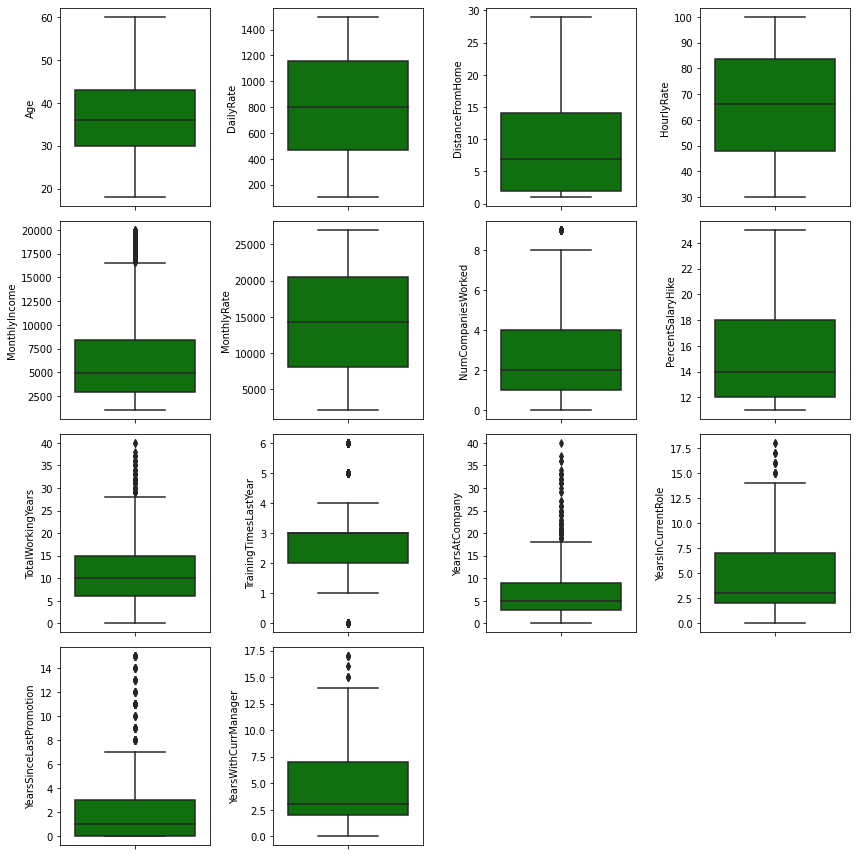

In [10]:
for i in range(0, len(numeric)):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y=df[numeric[i]], color='green', orient='v')
    plt.tight_layout()

In [11]:
#Delete outliers with Z Score method
df_outlier_clean = df.copy()

import scipy.stats as st
outliers = ['MonthlyIncome','YearsAtCompany', 'TotalWorkingYears', 'YearsSinceLastPromotion']

for i in outliers:
  z_scores = np.abs(st.zscore(df_outlier_clean[i]))
  filtered_entries = (z_scores < 2 )
  df_outlier_clean = df_outlier_clean[filtered_entries]

df_outlier_clean.shape

(1124, 31)

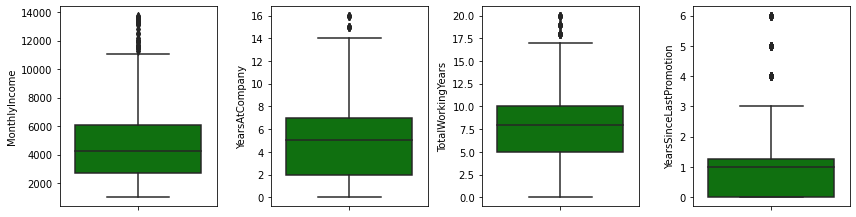

In [12]:
#Check outlier columns distribution after deleting outliers

for i in range(0, len(outliers)):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y=df_outlier_clean[outliers[i]], color='green', orient='v')
    plt.tight_layout()

**Findings:**

- Outliers deleted with Z Score method. Z Score threshold that we used is 2.
- 1470 -> 1124 rows. 346 rows (24.7%) deleted.

## Feature Engineering

### Feature Encoding

In [13]:
df_label = df_outlier_clean.copy()

df_label.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


In [14]:
#Label encoding

label_encoding = {"Attrition": {'No':0, "Yes": 1},
                  "OverTime":{'No':0, "Yes": 1},
                  "Gender":{'Male':0, "Female":1},
                  "BusinessTravel":{"Non-Travel":0,"Travel_Rarely":1,"Travel_Frequently":2}
                  }

df_label[['Attrition', 'OverTime',"Gender","BusinessTravel"]]=df_label[['Attrition', 'OverTime',"Gender","BusinessTravel"]].replace(label_encoding)
df_label[['Attrition', 'OverTime',"Gender","BusinessTravel"]].head()

,Attrition,OverTime,Gender,BusinessTravel
0,1,1,1,1
1,0,0,0,2
2,1,1,0,1
3,0,1,1,2
4,0,0,0,1


In [15]:
#One Hot Encoding

for i in ['MaritalStatus', 'EducationField', 'JobRole','Department']:
    onehots = pd.get_dummies(df_label[i], prefix=i)
    df_label = df_label.join(onehots)
    
df_label = df_label.drop(columns=['MaritalStatus', 'Department', 'EducationField', 'JobRole'], axis =1)
df_label.head()

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Department_Human Resources,Department_Research & Development,Department_Sales
0,41,1,1,1102,1,2,2,1,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,49,0,2,279,8,1,3,0,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,37,1,1,1373,2,2,4,0,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
3,33,0,2,1392,3,4,4,1,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,27,0,1,591,2,1,1,0,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0


**Findings:**

*   Label encoding for binary and ordinal data.
*   One hot encoding for categorical data.



### Feature Selection

In [16]:
# Function for deleting low features correlation to the variable target
def CorrTarget(df, target, treshold):
    low_correlation = df.corr()
    selection = low_correlation[round(abs(low_correlation[target]),2) >= treshold]
    index_values = selection.index.values
    correlation_1 = selection[index_values]
    return correlation_1, index_values

In [17]:
# Function for deleting redundant features
def cekRedundan(df, treshold):
    df_loop = df.copy()
    redundan = [
                [],[],[]
                ]    
    
    for index, row in df_loop.iterrows():
        for i in row.index.values:
            if (len(redundan[0]) == 0) | ((index+' - '+i not in redundan[2]) & (i+' - '+index not in redundan[2])) :
                nilai = df_loop.loc[index,i]
                if (abs(nilai) >= treshold) & (nilai != 1.0) :
                    redundan[0].append(index)
                    redundan[1].append(i)
                    redundan[2].append(index + ' - ' + i)
                    
    for i in redundan[2]:
        print(i)

In [18]:
#Choose a feature that has a correlation to the target variable

df_corr_target, kolom_corr_target = CorrTarget(df_label, 'Attrition', 0.1)
df_corr_target.shape
kolom_corr_target

array(['Age', 'Attrition', 'BusinessTravel', 'DistanceFromHome',
       'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'OverTime', 'StockOptionLevel',
       'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsWithCurrManager', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'JobRole_Sales Representative'],
      dtype=object)

In [19]:
df_select = df_label.copy()

# Select feature that has correlation to the target variable
df_select = df_select[kolom_corr_target]

In [20]:
#Choose redundant features
cekRedundan(df_select.corr(),0.7)


JobLevel - MonthlyIncome
YearsAtCompany - YearsInCurrentRole
YearsAtCompany - YearsWithCurrManager
YearsInCurrentRole - YearsWithCurrManager


In [21]:
#Delete redundan features

df_select = df_select.drop(['JobLevel', 'YearsInCurrentRole', 
                          'YearsWithCurrManager'], axis = 1)
df_select


,Age,Attrition,BusinessTravel,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,OverTime,StockOptionLevel,TotalWorkingYears,YearsAtCompany,MaritalStatus_Married,MaritalStatus_Single,JobRole_Sales Representative
0,41,1,1,1,2,3,4,5993,1,0,8,6,0,1,0
1,49,0,2,8,3,2,2,5130,0,1,10,10,1,0,0
2,37,1,1,2,4,2,3,2090,1,0,7,0,0,1,0
3,33,0,2,3,4,3,3,2909,1,0,8,8,1,0,0
4,27,0,1,2,1,3,2,3468,0,1,6,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,2,23,3,4,4,2571,0,1,17,5,1,0,0
1466,39,0,1,6,4,2,1,9991,0,1,9,7,1,0,0
1467,27,0,1,4,2,4,2,6142,1,1,6,6,1,0,0
1468,49,0,2,2,4,2,2,5390,0,0,17,9,1,0,0


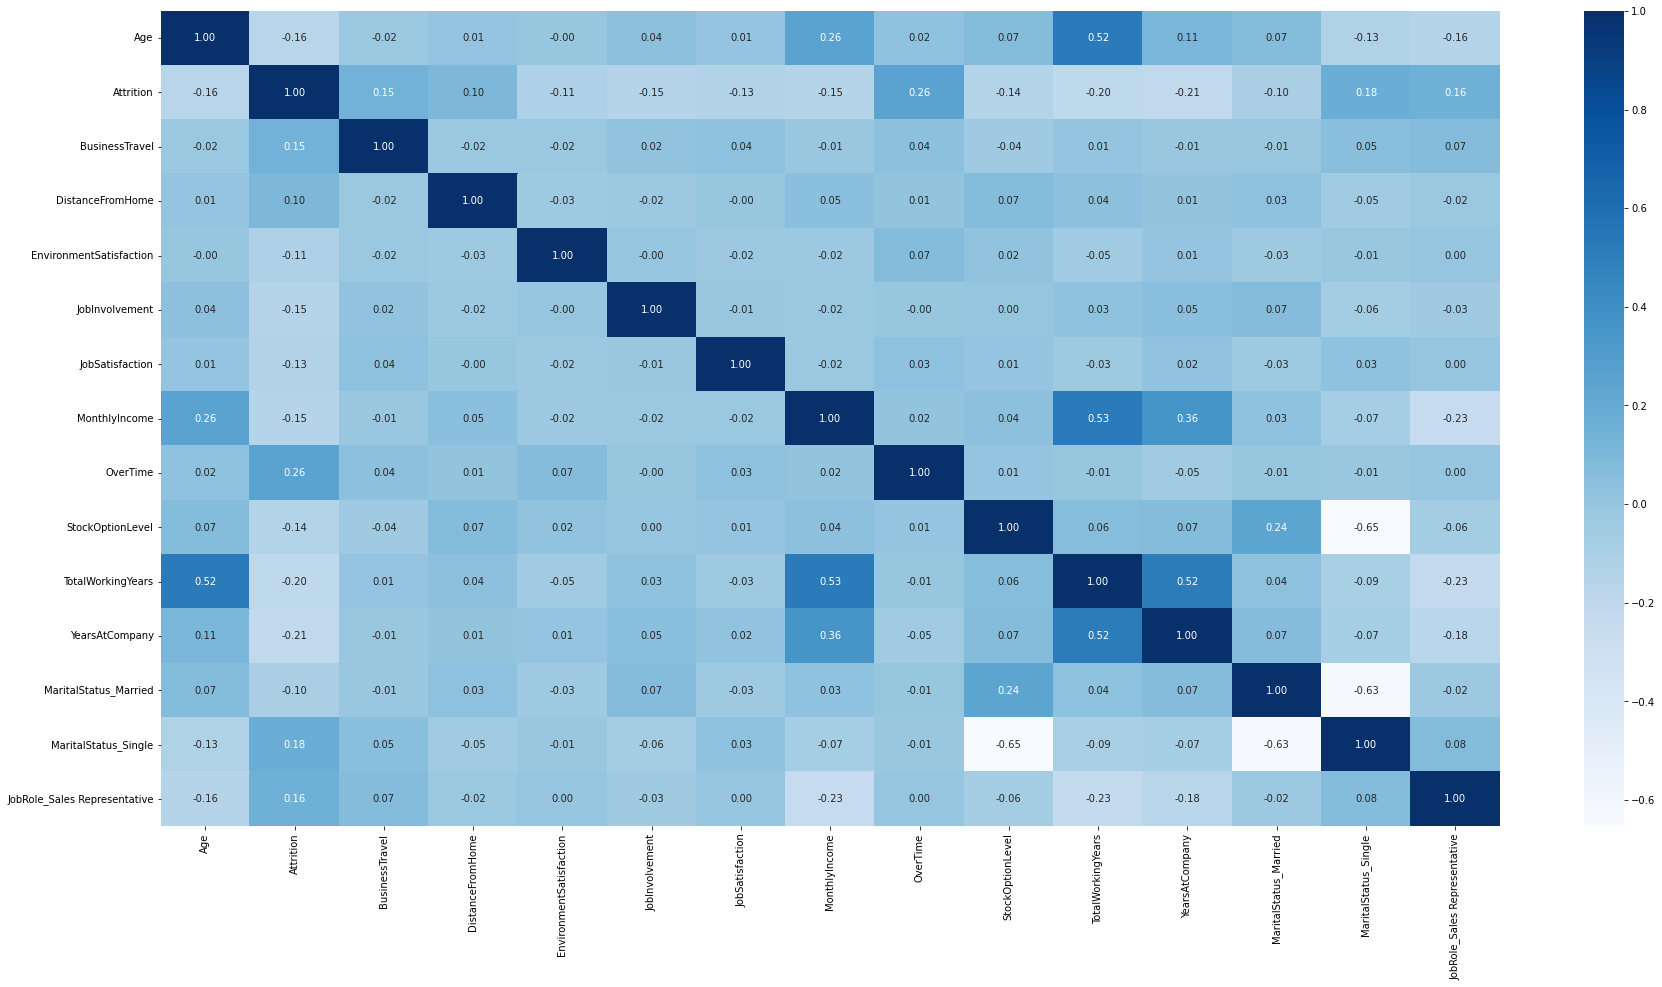

In [22]:
#Ploting features correlation with heatmap

plt.figure(figsize=(30,15))
sns.heatmap(df_select.corr(), cmap="Blues", annot=True, fmt='.2f')
plt.show()

**Finding:** 

The redundant features (correlation >0.7) and features with low correlation (< 0.1) to the target variable were removed.

## Feature Transformation

### Log Transform

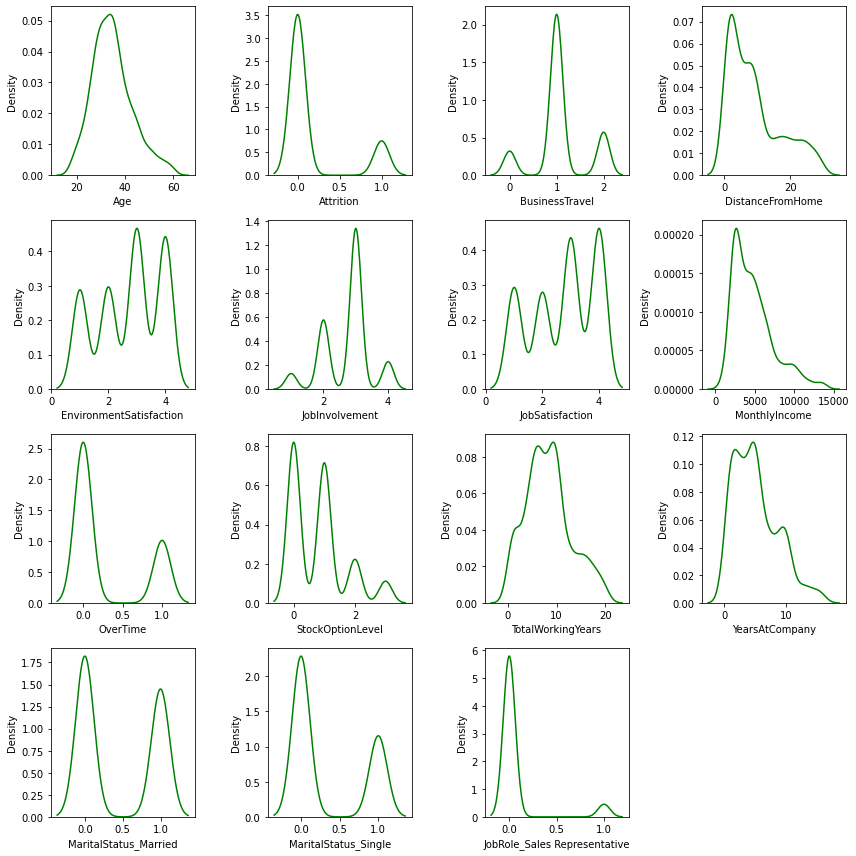

In [23]:
#Plot columns that need to be transformed
for i in range(0, len(df_select.columns)):
    plt.subplot(4, 4, i+1)
    sns.kdeplot(x=df_select[df_select.columns[i]], color='green')
    plt.xlabel(df_select.columns[i])
    plt.tight_layout()

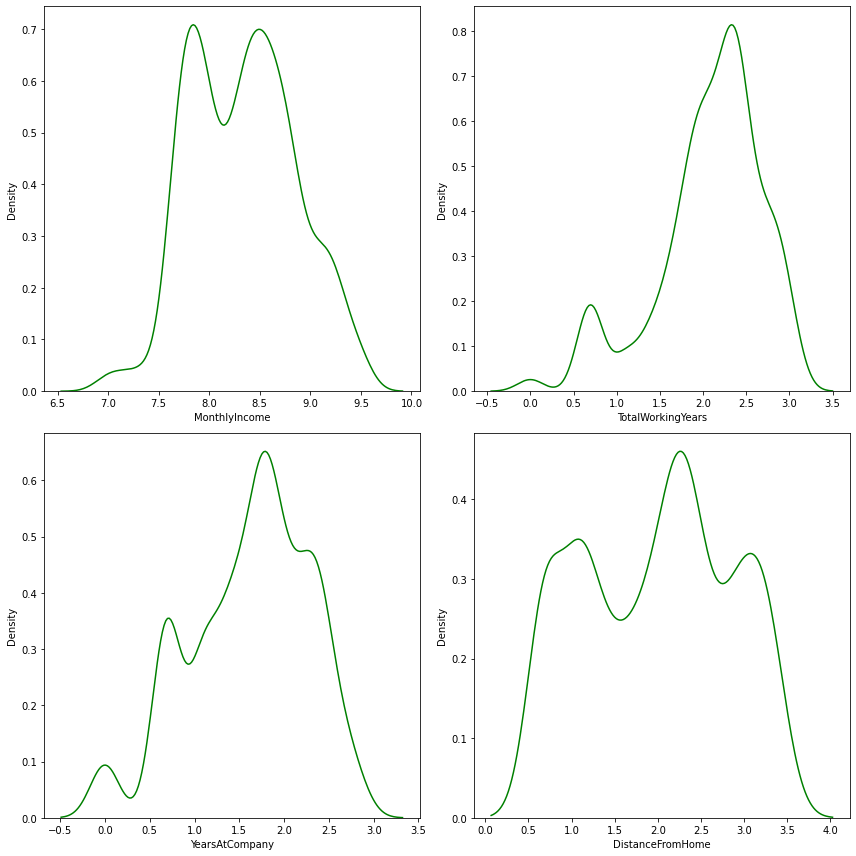

In [24]:
# List transformed columns
skew = ['MonthlyIncome', 'TotalWorkingYears',
        'YearsAtCompany', 'DistanceFromHome']
        
#Log(x+1) transform
df_transform = df_select.copy()
df_transform.loc[:, skew] = np.log(df_transform[skew] + 1)

#Replot transformed columns
for i in range(0, len(skew)):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(x=df_transform[skew[i]], color='green')
    plt.xlabel(skew[i])
    plt.tight_layout()

**Finding:**

A log transformation is performed to reduce the skewness of features that have high skewness.

### Normalisasi

In [25]:
df_transform.sample()

,Age,Attrition,BusinessTravel,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,OverTime,StockOptionLevel,TotalWorkingYears,YearsAtCompany,MaritalStatus_Married,MaritalStatus_Single,JobRole_Sales Representative
1305,54,0,1,2.079442,4,3,4,8.832734,0,1,2.70805,2.079442,1,0,0


In [26]:
#Normalize numeric data with StandardScaler
df_standard = df_transform.copy()

standard = ['Age', 'DistanceFromHome',
           'TotalWorkingYears', 
            'MonthlyIncome', 'YearsAtCompany']

from sklearn.preprocessing import StandardScaler
df_standard[standard] = StandardScaler().fit_transform(df_standard[standard].values.reshape(len(df_standard),5))

In [27]:
df_standard

,Age,Attrition,BusinessTravel,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,OverTime,StockOptionLevel,TotalWorkingYears,YearsAtCompany,MaritalStatus_Married,MaritalStatus_Single,JobRole_Sales Representative
0,0.754803,1,1,-1.528033,2,3,4,0.691118,1,0,0.197213,0.496956,0,1,0
1,1.720814,0,2,0.244084,3,2,2,0.391643,0,1,0.522532,1.178378,1,0,0
2,0.271798,1,1,-1.050311,4,2,3,-1.337604,1,0,0.006268,-2.436736,0,1,0
3,-0.211207,0,2,-0.711361,4,3,3,-0.700909,1,0,0.197213,0.875843,1,0,0
4,-0.935715,0,1,-1.050311,1,3,2,-0.362415,0,1,-0.210208,-0.780447,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.151047,0,2,1.399705,3,4,4,-0.938760,0,1,1.320914,0.264556,1,0,0
1466,0.513301,0,1,-0.052017,4,2,1,1.675557,0,1,0.368019,0.698271,1,0,0
1467,-0.935715,0,1,-0.448451,2,4,2,0.738419,1,1,-0.210208,0.496956,1,0,0
1468,1.720814,0,2,-1.050311,4,2,2,0.486865,0,0,1.320914,1.034686,1,0,0


#MACHINE LEARNING

## Modeling

**Metric evaluation focus on Recall (reduce False Negative) and ROC-AUC (imbalance data factor)**

### Import Library and Function

In [28]:
#Machine learning model library

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt

#Evaluation function
def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Train Set): %.2f" % f1_score(y_train, y_pred_train))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("AUC (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    print("AUC (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))

def eval_classification_over(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_over)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_over)
    print("Precision (Train Set): %.2f" % precision_score(y_over, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y_over, y_pred_train))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Train Set): %.2f" % f1_score(y_over, y_pred_train))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("AUC (train-proba): %.2f" % roc_auc_score(y_over, y_pred_proba_train[:, 1]))
    print("AUC (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))


def eval_classification_smote(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_smote)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_smote)
    print("Precision (Train Set): %.2f" % precision_score(y_smote, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y_smote, y_pred_train))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Train Set): %.2f" % f1_score(y_smote, y_pred_train))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("AUC (train-proba): %.2f" % roc_auc_score(y_smote, y_pred_proba_train[:, 1]))
    print("AUC (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))

#Confusion plot
def fixConfusion(y_pred_train, y_train):
  v_array = confusion_matrix(y_pred_train, y_train)
  tes=v_array
  tes2=[[],[]]
  n=len(tes)-1
  for i in range(0,len(tes)):
    m=len(tes[i])-1
    for j in range(0, len(tes[i])):
      tes2[i].append(tes[n][m])     
      m-=1
    n-=1

  tes2=np.array(tes2)
  sns.heatmap(tes2, annot=tes2, fmt='', cmap='Reds')

### Train test split

In [30]:
# Divide Features and Target

X = df_standard.drop(columns=['Attrition'], axis=1)
y = df_standard['Attrition']

In [31]:
from sklearn.model_selection import train_test_split

#Normal
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 42)

#Resampling
from imblearn import under_sampling, over_sampling
X_over, y_over = over_sampling.RandomOverSampler(0.95,random_state = 10).fit_resample(X_train, y_train) #Random
X_smote, y_smote = over_sampling.SMOTE(0.95,random_state = 75).fit_resample(X_train, y_train) #SMOTE


Because target variable is imbalance, we use three type of data.

- Natural (without resampling)
- Random Oversampling
- SMOTE Oversampling

### Logistic Regression

In [32]:
# #Hyperparameter
penalty = ['l1', 'l2', 'elasticnet']
C = [0.08, 0.09, 0.1,1.1, 1.2,1.3,1.4,1.6,1.7,1 ,1.5]
max_iter = [10,12,20]
solver = ['newton-cg', 'sag', 'saga', 'liblinear','lbfgs']
lr_hyperparams = dict(penalty=penalty, C=C, solver=solver, max_iter=max_iter)

#Initiation
lr = LogisticRegression(random_state=42)

#Fit hyperparameter to model
lr_cv_1 = GridSearchCV(lr, lr_hyperparams, cv=5, scoring='recall')
lr_cv_1.fit(X_train, y_train) #Normal

lr_cv_2 = GridSearchCV(lr, lr_hyperparams, cv=5, scoring='recall')
lr_cv_2.fit(X_over, y_over) #Random Oversampling

lr_cv_3 = GridSearchCV(lr, lr_hyperparams, cv=5, scoring='recall')
lr_cv_3.fit(X_smote, y_smote) #SMOTE

#Evaluation
print("Normal:")
eval_classification(lr_cv_1)
print("\nRandom Oversampling:")
eval_classification_over(lr_cv_2)
print("\nSMOTE:")
eval_classification_smote(lr_cv_3)

Normal:
Precision (Train Set): 0.72
Precision (Test Set): 0.79
Recall (Train Set): 0.38
Recall (Test Set): 0.43
F1-Score (Train Set): 0.50
F1-Score (Test Set): 0.56
AUC (train-proba): 0.84
AUC (test-proba): 0.85

Random Oversampling:
Precision (Train Set): 0.78
Precision (Test Set): 0.41
Recall (Train Set): 0.76
Recall (Test Set): 0.75
F1-Score (Train Set): 0.77
F1-Score (Test Set): 0.53
AUC (train-proba): 0.84
AUC (test-proba): 0.85

SMOTE:
Precision (Train Set): 0.77
Precision (Test Set): 0.41
Recall (Train Set): 0.82
Recall (Test Set): 0.68
F1-Score (Train Set): 0.79
F1-Score (Test Set): 0.51
AUC (train-proba): 0.87
AUC (test-proba): 0.81


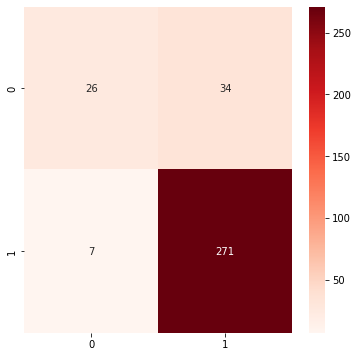

In [33]:
#Confusion Plot
plt.figure(figsize=(6,6))
y_pred = lr_cv_1.predict(X_test)
fixConfusion(y_test, y_pred)

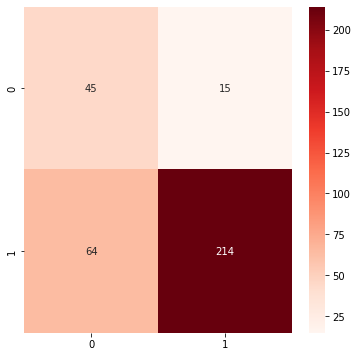

In [34]:
#Confusion Plot
plt.figure(figsize=(6,6))
y_pred = lr_cv_2.predict(X_test)
fixConfusion(y_test, y_pred)

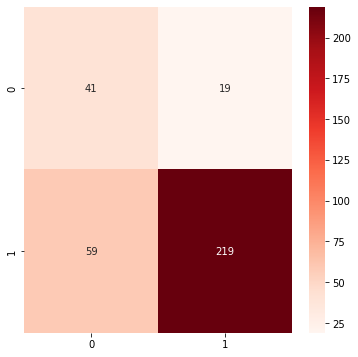

In [35]:
#Confusion Plot
plt.figure(figsize=(6,6))
y_pred = lr_cv_3.predict(X_test)
fixConfusion(y_test, y_pred)

### Random Forest

In [36]:
#Hyperparameter
n_estimators = [int(x) for x in np.linspace(1, 100, num=100)]
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)]
min_samples_split = [int(x) for x in np.linspace(1, 40, num=40)]
min_samples_leaf = [int(x) for x in np.linspace(1, 20, num=20)]
max_features = ['auto', 'sqrt']
criterion = ['gini', 'entropy']
rf_hyperparameters = dict(n_estimators=n_estimators,
                  max_depth=max_depth,
                  min_samples_split=min_samples_split,
                  min_samples_leaf=min_samples_leaf,
                  max_features=max_features,
                  criterion=criterion)
#Initiation
rf = RandomForestClassifier(random_state=42)

#Fit hyperparameter to model
rf1 = RandomizedSearchCV(rf, rf_hyperparameters, cv=5, random_state=42, scoring='recall')
rf1.fit(X_train,y_train) #Normal

rf2 = RandomizedSearchCV(rf, rf_hyperparameters, cv=5, random_state=42, scoring='recall')
rf2.fit(X_over,y_over) #Random Oversampling

rf3 = RandomizedSearchCV(rf, rf_hyperparameters, cv=5, random_state=42, scoring='recall')
rf3.fit(X_smote,y_smote) #SMOTE

#Evaluation
print("Normal:")
eval_classification(rf1)
print("\nRandom Oversampling:")
eval_classification_over(rf2)
print("\nSMOTE:")
eval_classification_smote(rf3)



Normal:
Precision (Train Set): 0.96
Precision (Test Set): 0.77
Recall (Train Set): 0.79
Recall (Test Set): 0.28
F1-Score (Train Set): 0.87
F1-Score (Test Set): 0.41
AUC (train-proba): 0.99
AUC (test-proba): 0.81

Random Oversampling:
Precision (Train Set): 0.99
Precision (Test Set): 0.65
Recall (Train Set): 1.00
Recall (Test Set): 0.53
F1-Score (Train Set): 0.99
F1-Score (Test Set): 0.59
AUC (train-proba): 1.00
AUC (test-proba): 0.84

SMOTE:
Precision (Train Set): 0.99
Precision (Test Set): 0.55
Recall (Train Set): 0.99
Recall (Test Set): 0.52
F1-Score (Train Set): 0.99
F1-Score (Test Set): 0.53
AUC (train-proba): 1.00
AUC (test-proba): 0.80


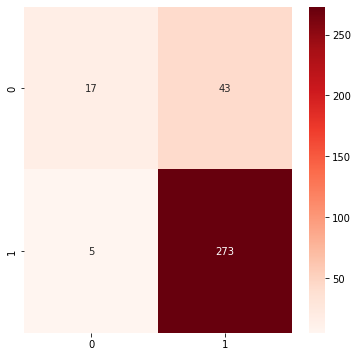

In [37]:
#Confusion Plot
plt.figure(figsize=(6,6))
y_pred = rf1.predict(X_test)
fixConfusion(y_test, y_pred)

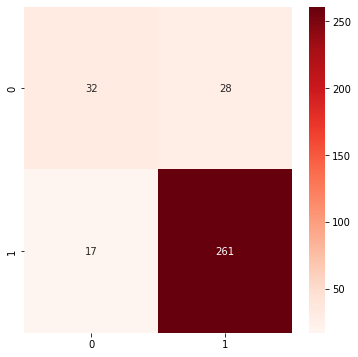

In [38]:
#Confusion Plot
plt.figure(figsize=(6,6))
y_pred = rf2.predict(X_test)
fixConfusion(y_test, y_pred)

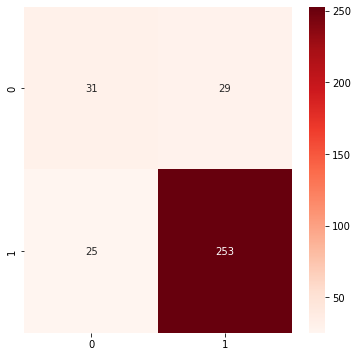

In [39]:
#Confusion Plot
plt.figure(figsize=(6,6))
y_pred = rf3.predict(X_test)
fixConfusion(y_test, y_pred)

### XGBoost

In [40]:
# Hyperparameter
n_estimators = [int(x) for x in np.linspace(1, 100, num=100)]
max_depth = [int(x) for x in np.linspace(6,30,5)]
learning_rate = [0.01,0.02,0.03,0.04,0.05,1]
min_child_weight = list(range(1,10))
xg_hyperparameters = dict(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, 
               min_child_weight=min_child_weight)

#Model
xgb_booster = xgboost.XGBClassifier(random_state=42)

#Fit hyperparameter to model
xgb_b1 = RandomizedSearchCV(xgb_booster, xg_hyperparameters, cv=5, random_state=42, scoring='recall')
xgb_b1.fit(X_train,y_train) #Normal

xgb_b2 = RandomizedSearchCV(xgb_booster, xg_hyperparameters, cv=5, random_state=42, scoring='recall')
xgb_b2.fit(X_over,y_over) #Random Oversampling

xgb_b3 = RandomizedSearchCV(xgb_booster, xg_hyperparameters, cv=5, random_state=42, scoring='recall')
xgb_b3.fit(X_smote,y_smote) #SMOTE

#Evaluation
print("Normal:")
eval_classification(xgb_b1)
print("\nRandom Oversampling:")
eval_classification_over(xgb_b2)
print("\nSMOTE:")
eval_classification_smote(xgb_b3)

Normal:
Precision (Train Set): 1.00
Precision (Test Set): 0.57
Recall (Train Set): 1.00
Recall (Test Set): 0.48
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.52
AUC (train-proba): 1.00
AUC (test-proba): 0.79

Random Oversampling:
Precision (Train Set): 1.00
Precision (Test Set): 0.47
Recall (Train Set): 1.00
Recall (Test Set): 0.48
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.48
AUC (train-proba): 1.00
AUC (test-proba): 0.79

SMOTE:
Precision (Train Set): 1.00
Precision (Test Set): 0.52
Recall (Train Set): 1.00
Recall (Test Set): 0.57
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.54
AUC (train-proba): 1.00
AUC (test-proba): 0.77


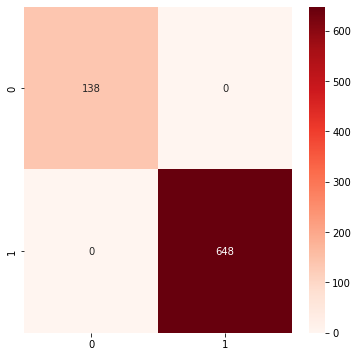

In [41]:
#Confusion Plot
plt.figure(figsize=(6,6))
y_pred = xgb_b1.predict(X_train)
fixConfusion(y_train, y_pred)

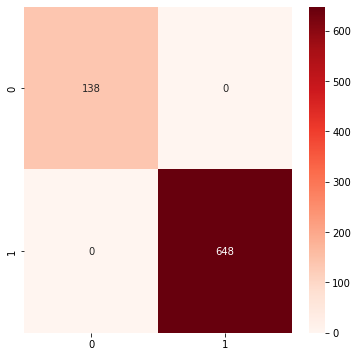

In [42]:
#Confusion Plot
plt.figure(figsize=(6,6))
y_pred = xgb_b2.predict(X_train)
fixConfusion(y_train, y_pred)

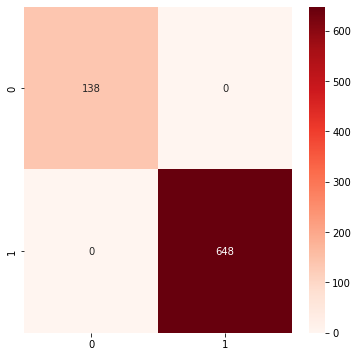

In [43]:
#Confusion Plot
plt.figure(figsize=(6,6))
y_pred = xgb_b3.predict(X_train)
fixConfusion(y_train, y_pred)

### Comparison

| Algorithm          | Recall (Train) | Recall (Test) |ROC-AUC (Train)|ROC-AUC (Test) |Sampling Type    |
|--------------------|--------------------|-------------------|---------|-----|----|
| **Logistic Regression**      | 0.38             | 0.43  |0.84|0.85   | Normal |                |
|       | **0.76**               | **0.75**   |**0.84** |**0.85**   | **Oversampling (Best Fit)** |
|       | 0.82               | 0.68    |0.87|0.81 | SMOTE |
| Random Forest      | 0.79              | 0.28  |0.99|0.81   | Normal |                |
|       | 1.00               | 0.53   |1.00 |0.82   | Oversampling |
|       | 0.99               | 0.52   |1.00|0.80 | SMOTE |
| XGBoost      | 1.00             | 0.48  |1.00|0.78   | Normal |                |
|       | 1.00               | 0.48   |1.00 |0.79   | Oversampling |
|       | 1.00              | 0.57    |1.00|0.77 | SMOTE |

## Explain The Model

**Using SHAP Value to explain model.**

In [44]:
pip install shap

In [45]:
#Initiation
model = lr_cv_2.best_estimator_

import shap
explainer = shap.LinearExplainer(model, X_over, feature_dependence="independent")
shap_values = explainer.shap_values(X_test)
X_test_array = np.asarray(X_test)

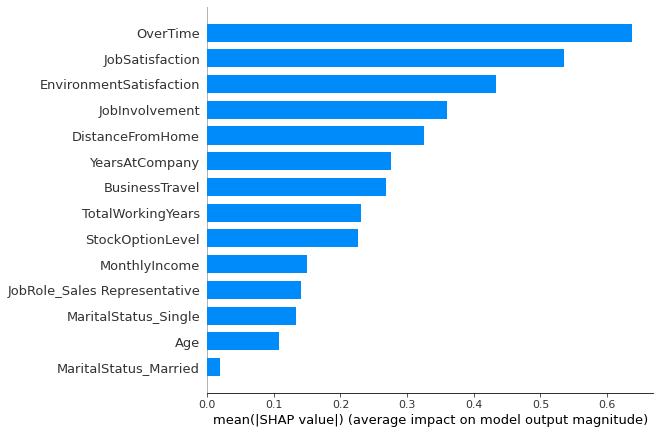

In [46]:
#Feature Importance
shap.summary_plot(shap_values, X_over.values, plot_type="bar", feature_names = X_over.columns)

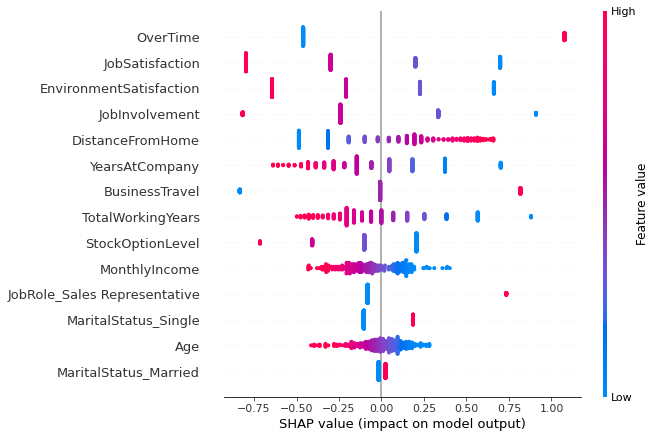

In [47]:
#Feature Importance (2)

shap.summary_plot(shap_values, X_test_array, feature_names = X_over.columns)

**Findings:**

- Top 3 Global Features : **`Overtime, Job Satisfaction, Environment Satisfaction`**
- Top 3 feature impact to Attrition: **`Overtime, Distance From Home, Business Travel`**
- Top 3 feature impact to No Attrition: **`Job Satisfaction, Environment Satisfaction, Job Involvement.`**

# SIMULATION WITH MANIPULATED DATA

In [48]:
# Load data
df_base = pd.read_csv('Employee_Attrition.csv')
df_base['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

**Attrition 237 -> about 16%**

In [49]:
# Select employee attrition with overtime
df_attr_over = df_base[(df_base['Attrition']=='Yes') & (df_base['OverTime']=='Yes')]

# Select 50 % of dataset
sample_index = df_attr_over.sample(int(df_attr_over.shape[0] * 0.5), random_state=42).index.values

In [50]:
# Manipulation criteria

df_simulator = df_base.copy()
df_simulator.loc[sample_index,'OverTime'] = 'No' #Change to no overtime

In [51]:
#Processing dataset

kolom_used = ['Age', 'BusinessTravel', 'DistanceFromHome',
       'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction',
       'MonthlyIncome', 'OverTime', 'StockOptionLevel', 'TotalWorkingYears',
       'YearsAtCompany', 'MaritalStatus_Married', 'MaritalStatus_Single',
       'JobRole_Sales Representative']


# Label encoding
sim_label_encoding = {"Attrition": {'No':0, "Yes": 1},
                  "OverTime":{'No':0, "Yes": 1},
                  "Gender":{'Male':0, "Female":1},
                  "BusinessTravel":{"Non-Travel":0,"Travel_Rarely":1,"Travel_Frequently":2}
                  }

df_simulator[['Attrition', 'OverTime',"Gender","BusinessTravel"]]=df_simulator[['Attrition', 'OverTime',"Gender","BusinessTravel"]].replace(sim_label_encoding)



#One Hot Encoding

for i in ['MaritalStatus', 'EducationField', 'JobRole','Department']:
    sim_onehots = pd.get_dummies(df_simulator[i], prefix=i)
    df_simulator = df_simulator.join(sim_onehots)
    
df_simulator = df_simulator.drop(columns=['MaritalStatus', 'Department', 'EducationField', 'JobRole'], axis =1)
df_simulator.head()

df_ready = df_simulator[df_simulator['Attrition'] == 1]
df_ready = df_ready[kolom_used]

#Standardize
standard = ['Age', 'DistanceFromHome',
           'TotalWorkingYears', 
            'MonthlyIncome', 'YearsAtCompany']
from sklearn.preprocessing import StandardScaler
df_ready[standard] = StandardScaler().fit_transform(df_ready[standard].values.reshape(len(df_ready),5))


In [52]:
#Result 

df_hasil = pd.DataFrame(lr_cv_2.predict(df_ready))
df_hasil.value_counts()

1    133
0    104
dtype: int64

**Findings:**

- Attrition with manipulated data is 133. Only about 9% Attrition.
- Manipulation data use only 50% of Attrition == Yes data.
- Manipulating only Overtime column.

# Conclusion

## Result

- ML model with random oversampling Logistic Regression, have recall score 76% on data train and 75% on data test.
- Top 3 Global features that drive Attrition are Overtime, Job Satisfaction and Environmnent Satisfaction.
- Manipulated data with changing Yes Overtime to No Overtime for 119 employee reduce attrition from 16% --> 6%.

## Recommendation

***Since Overtime has a high impact on Employee Attrition, companies should focus on changing the company's Overtime structure.***

**Evaluate the cause of Overtime**

Seeing the root of the problem is the most important thing. The HR team can retrieve data from employees who often get Overtime to see the main Overtime problems. Things like excessive workload, unclear job descriptions, and lack of team communication can be major factors.

**Making Overtime Policy**

Implement standard Overtime limits for each employee and provide monthly/quarterly/annual compensation according to the number of Overtime hours of the employee.

Can take leave the next day or get compensation directly if in one day the Overtime exceeds the daily standard limit.

**Conducting a Cross-Training program**

Providing additional training outside the field can be a solution for companies to make employee skills even, thereby reducing the accumulation of work by several employees due to the lack of experts.

**Work Efficiency**

Conduct further studies on jobs that often get Overtime such as Sales Representative, regarding the utility of resources whether sufficient or require additional resources.